In [1]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim

import time

import numpy as np

import sys
sys.path.insert(0, './')

from data import GaussianGalaxies
from vae import VAE

device = 'cuda:0'

import matplotlib.pyplot as plt
%matplotlib inline

# Create dataset

In [2]:
batch_size = 64
n_images = batch_size * 200

slen = 51

dataset = GaussianGalaxies(n_images = n_images, 
                           slen = slen)
data_loader = DataLoader(dataset, batch_size=batch_size)

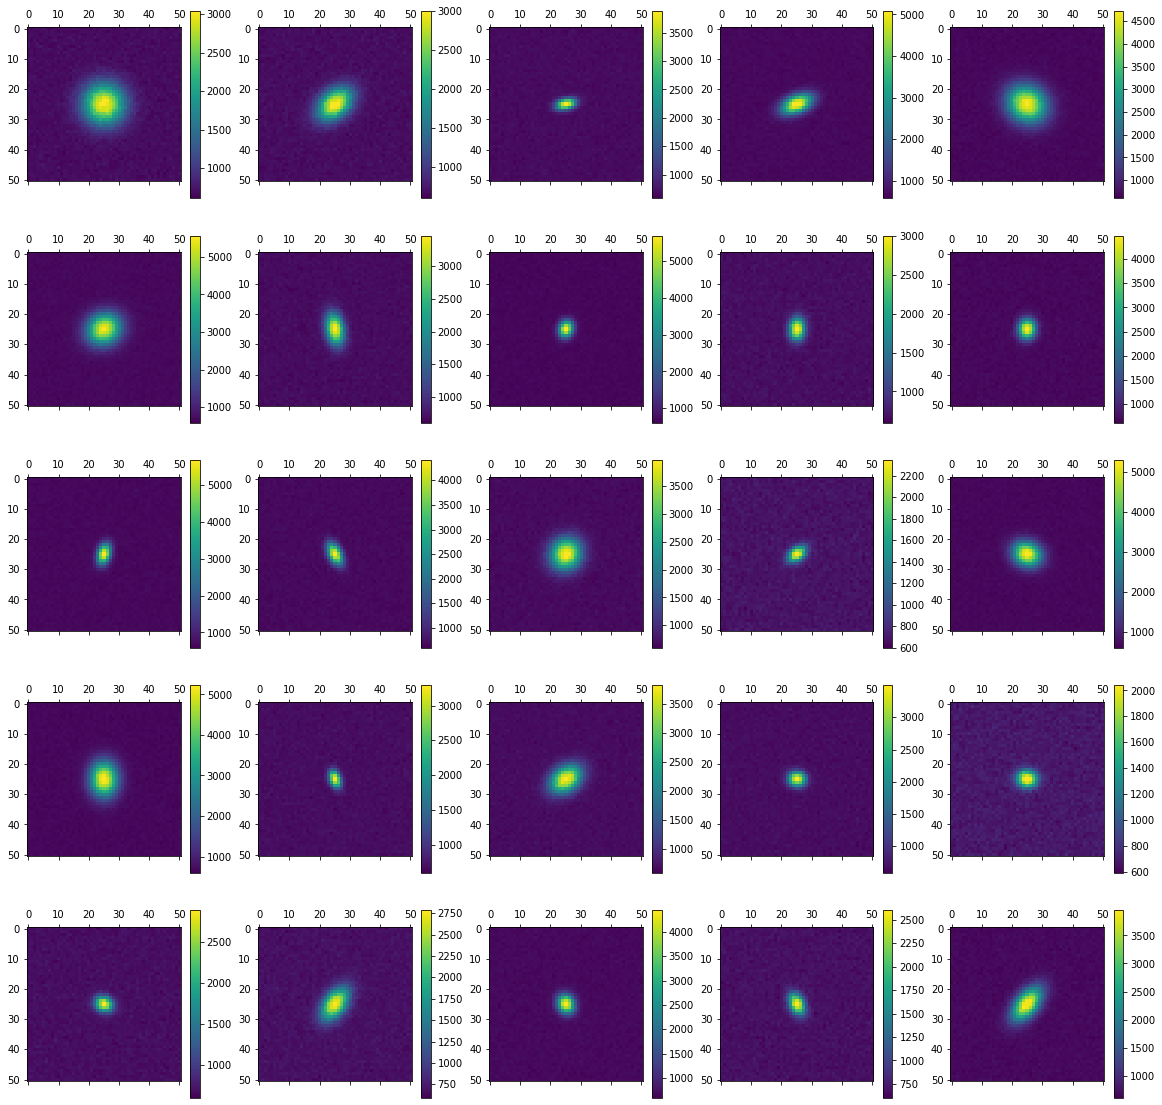

In [3]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i in range(25): 
    
    indx = np.random.choice(n_images)
    
    x0 = i // 5
    x1 = i % 5
    
    image = dataset[indx]
    
    im = ax[x0, x1].matshow(image[0].cpu())
    
    fig.colorbar(im, ax = ax[x0, x1])

In [4]:
dataset.images.shape

torch.Size([12800, 1, 51, 51])

# Define VAE

In [5]:
galaxy_vae = VAE(slen = slen)
galaxy_vae.to(device)
galaxy_vae.eval()

VAE(
  (encoder): Encoder(
    (features): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): Flatten()
      (7): Linear(in_features=41616, out_features=256, bias=True)
      (8): ReLU()
      (9): Linear(in_features=256, out_features=256, bias=True)
      (10): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
      (11): ReLU()
      (12): Dropout(p=0.1, inplace=False)
      (13): Linear(in_features=256, out_features=256, bias=True)
      (14): ReLU()
      (15): Linear(in_features=256, out_features=256, bias=True)
      (16): ReLU()
    )
    (fc1): Linear(in_features=256, out_features=8, bias=True)
    (fc2): Linear(in_features=256, out_features=8, bias=True)
  )
  (decoder): Decoder(
    (fc): Seq

# Train 

In [6]:
for _, images in enumerate(data_loader):
    break

In [7]:
images.shape

torch.Size([64, 1, 51, 51])

In [8]:
# initial loss 
loss = galaxy_vae.get_loss(images).mean()
print('initial loss: {}'.format(loss))

initial loss: 180622.5


In [9]:
optimizer = optim.Adam(galaxy_vae.parameters())

In [10]:
n_epochs = 30

In [11]:
galaxy_vae.train()
t0 = time.time() 

for epoch in range(n_epochs): 
    
    avg_loss = 0.
    
    for _, images in enumerate(data_loader):
        loss = galaxy_vae.get_loss(images).mean()
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        avg_loss += loss 
        
    print('epoch [{}]. loss = {}'.format(epoch, avg_loss / len(data_loader)))

print('done. Elapsed {:.03f}sec'.format(time.time() - t0))

epoch [0]. loss = 37947.1484375
epoch [1]. loss = 16831.54296875
epoch [2]. loss = 15321.40625
epoch [3]. loss = 13776.890625
epoch [4]. loss = 13615.6259765625
epoch [5]. loss = 13512.794921875
epoch [6]. loss = 13551.78515625
epoch [7]. loss = 13651.060546875
epoch [8]. loss = 13387.3408203125
epoch [9]. loss = 13175.2646484375
epoch [10]. loss = 13271.5986328125
epoch [11]. loss = 13799.7255859375
epoch [12]. loss = 14250.4892578125
epoch [13]. loss = 13646.5888671875
epoch [14]. loss = 13324.4130859375
epoch [15]. loss = 13164.0693359375
epoch [16]. loss = 13090.2724609375
epoch [17]. loss = 13132.888671875
epoch [18]. loss = 13410.89453125
epoch [19]. loss = 13850.9775390625
epoch [20]. loss = 14134.7392578125
epoch [21]. loss = 13603.1708984375
epoch [22]. loss = 13283.3486328125
epoch [23]. loss = 13201.0107421875
epoch [24]. loss = 13340.017578125
epoch [25]. loss = 13642.7783203125
epoch [26]. loss = 13859.3359375
epoch [27]. loss = 14032.2646484375
epoch [28]. loss = 13769.47

In [12]:
# final loss
galaxy_vae.eval()
loss = galaxy_vae.get_loss(images).mean()
print('final loss: {}'.format(loss))

final loss: 12677.376953125


# Evaluate

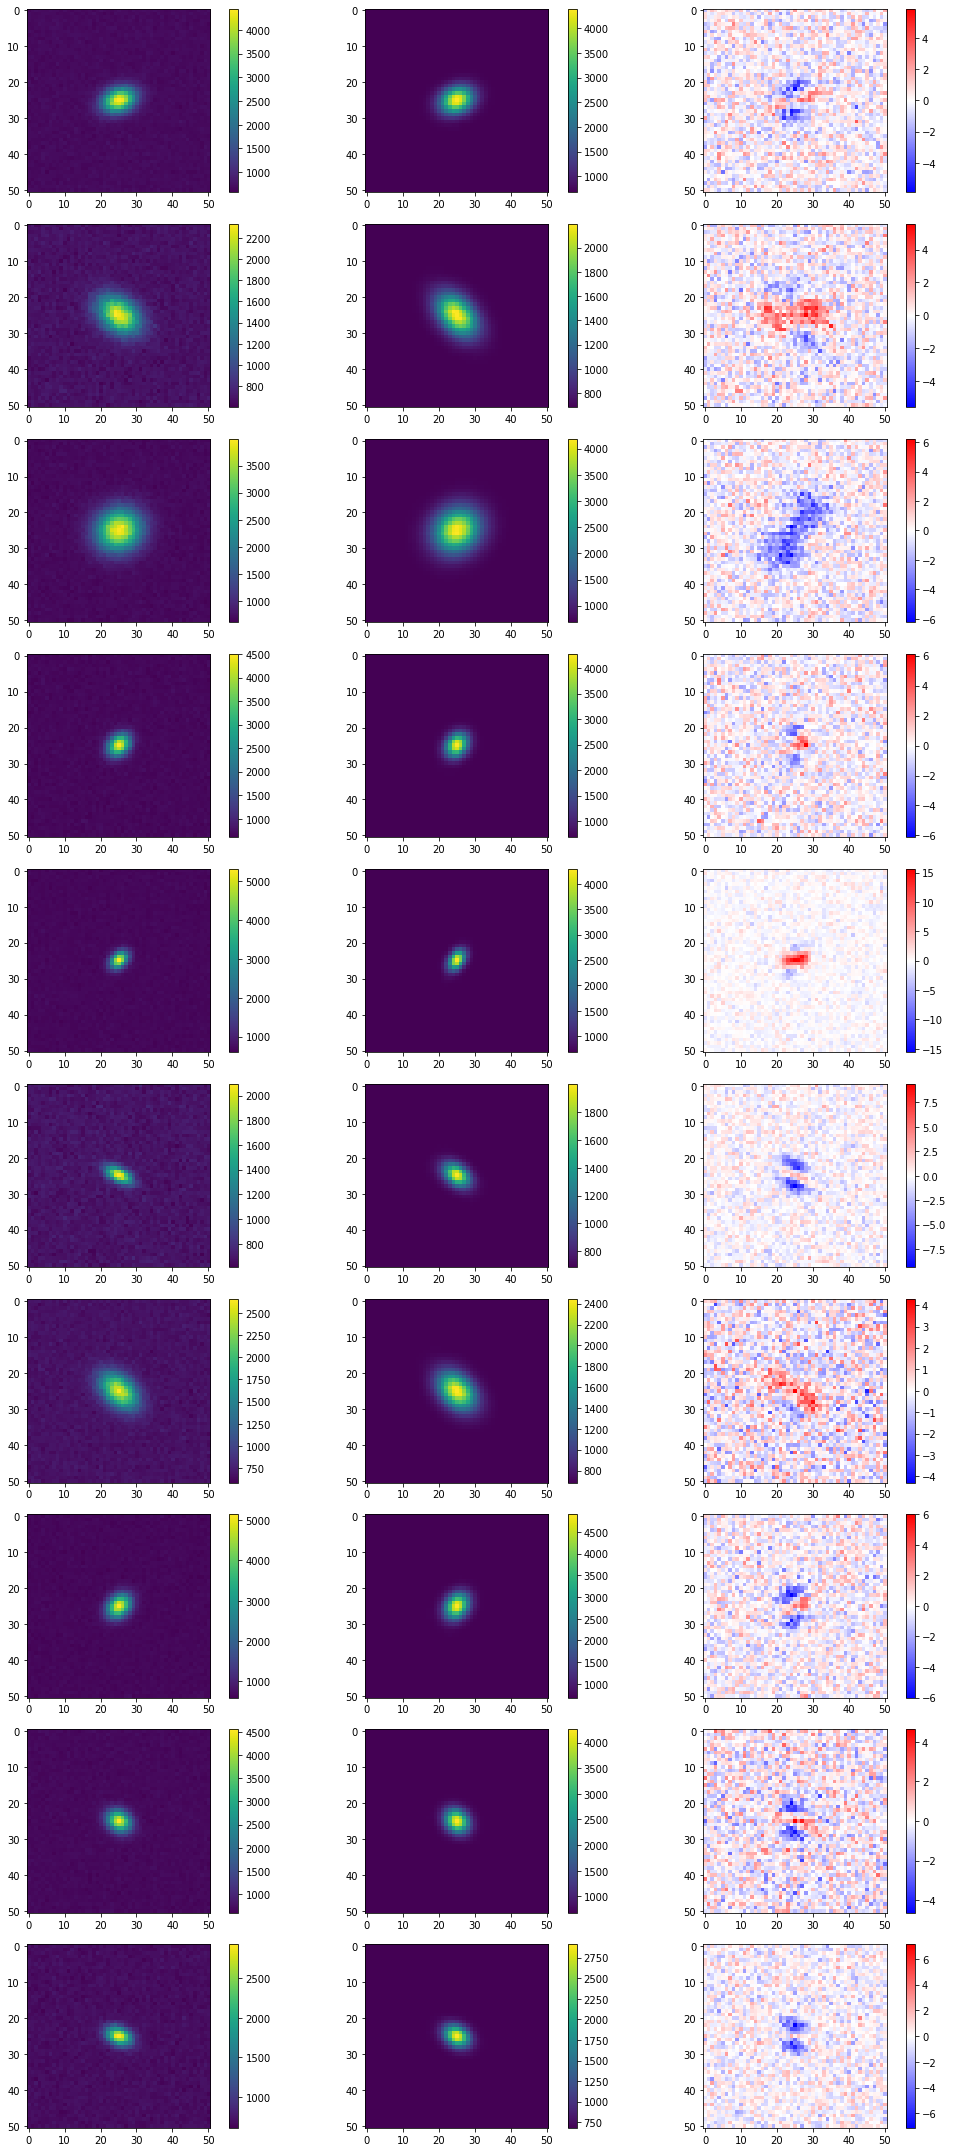

In [13]:
for images in data_loader:
    break

recon_mean = galaxy_vae(images)[0]

fig, ax = plt.subplots(10, 3, figsize=(15, 30))

for i in range(10):
    
    ax1 = ax[i, 0]
    ax2 = ax[i, 1]
    ax3 = ax[i, 2]
    
    # plot image
    im1 = ax1.imshow(images[i, 0].cpu())
    fig.colorbar(im1, ax=ax1)
    
    im2 = ax2.imshow(recon_mean[i, 0].detach().cpu())
    fig.colorbar(im2, ax=ax2)    
    
    x = images[i, 0]
    y = recon_mean[i, 0]
    diff = ((x - y) / torch.sqrt(y)).detach().cpu()
    vmax = diff.abs().max()
    im3 = ax3.imshow(diff, vmax = vmax, vmin = -vmax, cmap = plt.get_cmap('bwr'))
    fig.colorbar(im3, ax = ax3)
    
    fig.tight_layout()